# Problem:

# Using the CIFAR-10 dataset, build a Convolutional Neural Network (CNN) to classify the 10 different classes of images. The network should have the following structure:

# • Two convolutional layers with max-pooling.

# • One fully connected layer with dropout for regularization.

# • Output layer with 10 neurons and softmax activation.

# Task:

# • Implement the model using Keras/TensorFlow.

# • Train the model for 10 epochs and evaluate its accuracy on the test set.

# Plot the training and validation accuracy and loss curves.

# • Aim for at least 70% accuracy on the test set.

In [10]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = keras.datasets.cifar10.load_data()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = df

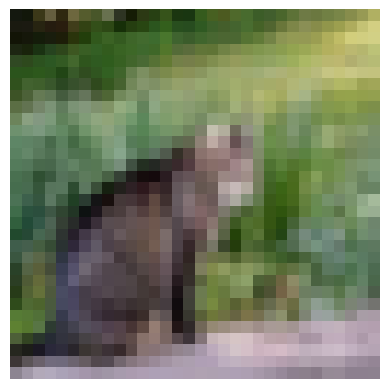

In [17]:
rd = np.random.randint(0, 10000)

plt.imshow(x_train[rd])
plt.axis('off')
plt.show()

In [5]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 99ms/step - accuracy: 0.3260 - loss: 1.8458 - val_accuracy: 0.5186 - val_loss: 1.3652
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.5288 - loss: 1.3172 - val_accuracy: 0.5927 - val_loss: 1.1593
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.5905 - loss: 1.1584 - val_accuracy: 0.6054 - val_loss: 1.1153
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.6338 - loss: 1.0456 - val_accuracy: 0.6554 - val_loss: 0.9930
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 116ms/step - accuracy: 0.6577 - loss: 0.9704 - val_accuracy: 0.6551 - val_loss: 0.9828
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 104ms/step - accuracy: 0.6847 - loss: 0.8964 - val_accuracy: 0.6707 - val_loss: 0.9426
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.7028 - loss: 0.8499 - val_accuracy: 0.6630 - val_loss: 0.9508
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.7189 - loss: 0.7968 

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5412 - loss: 184.8209
Test accuracy: 0.54


In [20]:
training_accuracy = history.history['accuracy']

final_accuracy = training_accuracy[-1]
print(f'training accuracy: {final_accuracy:.2f}')

training accuracy: 0.75


In [21]:
training_accuracy = history.history['val_accuracy']

final_accuracy = training_accuracy[-1]
print(f'Validation Accuracy: {final_accuracy:.2f}')

Validation Accuracy: 0.69


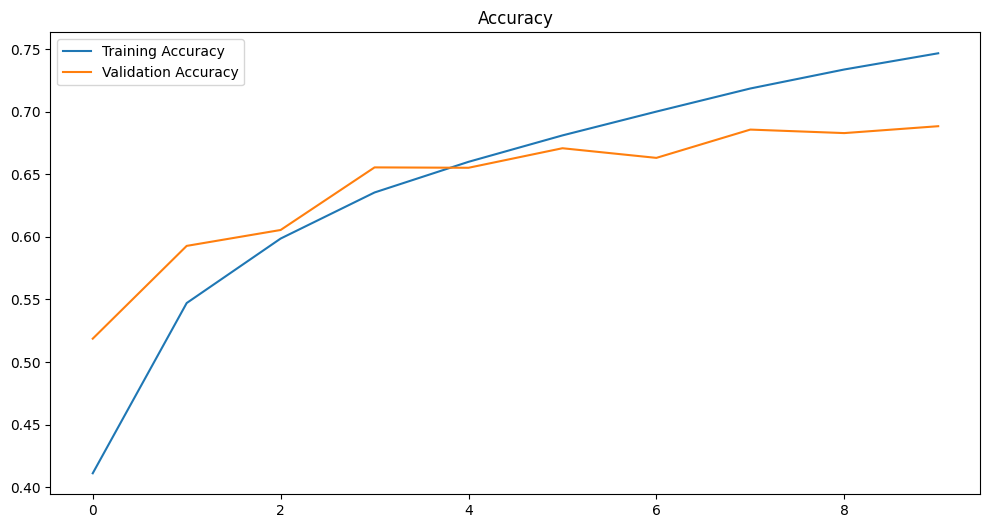

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

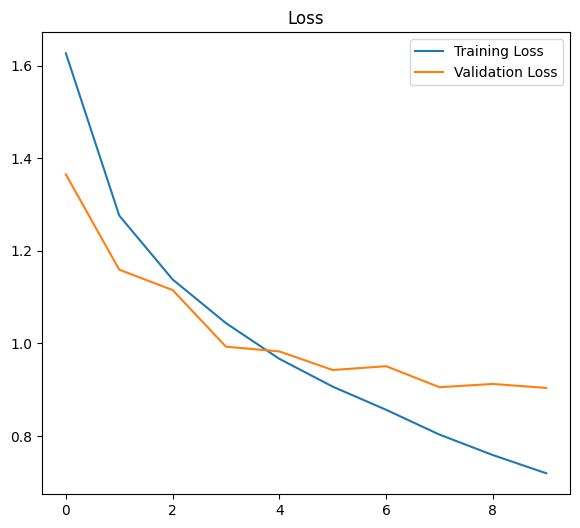

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
